In [1]:
import numpy as np
import pandas as pd

In [9]:
df= pd.read_csv('property_data.csv')
df.head(7)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950


In [6]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [10]:
#untuk cek kolom yang non expected
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt,'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

In [14]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


#### summarizing missing values

In [12]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

In [13]:
df.isnull().values.any()

True

#### Replacing

In [15]:
# ubah isi ke nilai 125
df['ST_NUM'].fillna(125, inplace = True)

In [ ]:
# cara lainnya untuk baris tertentu saja
df.loc[2,'ST_NUM'] = 125

In [16]:
%matplotlib inline
df2=pd.ExcelFile('obes.xls')

In [19]:
df2.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [21]:
df2_age= df2.parse(u'7.2',skiprows=4,skipfooter=14)

In [22]:
df2_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [29]:
# ganti kolom yg tak terdeteksi
df2_age.rename(columns={u'Unnamed: 0':u'year'},inplace=True)

In [26]:
#hapus baris kosong
df2_age.dropna(inplace= True)

In [30]:
df2_age.head()

,year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


In [31]:
#mengubah kolom year menjadi indexnya
df2_age.set_index('year',inplace=True)

In [33]:
df2_age.head(10)

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [50]:
df3=df2_age.drop('Total',1)


In [51]:
df3

,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
year,,,,,,,,
2002/03,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [46]:
df2_age

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


<AxesSubplot:xlabel='year'>

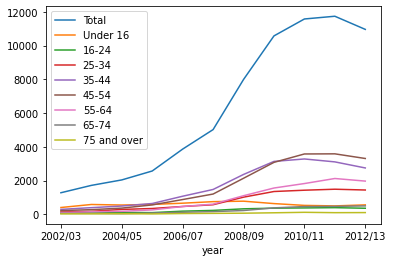

In [47]:
df2_age.plot()